# GRIP June 21 Batch- Data Science and Business Analytics Internship

<b> Author: Merlin <b/>

# Task 3: Exploratory Data Analysis - Retail Dataset

In [1]:
#importing required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df=pd.read_csv(r'C:\Users\user_2\Downloads\SampleSuperstore.csv', header=0)

In [3]:
#first five observations#importing the dataset
df=pd.read_csv(r'C:\Users\user_2\Downloads\SampleSuperstore.csv', header=0)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#last five observations
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
#dimensions of the dataset 
df.shape

(9994, 13)

There are 9994 observations and 13 variables

In [6]:
#to print column names 
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
#data type of the variables 
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are no null values 

In [9]:
#to show statistical characteristics of numerical variables 
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In Sales and Profit column mean is greater than median, indicating the presence of extreme outliers 

In [10]:
#Checking for duplicate records 
df.duplicated().sum()

17

In [11]:
#dropping the duplicates 
df=df.drop_duplicates()

In [12]:
df.shape

(9977, 13)

After dropping the duplicates the dimension of the dataset changed to 9977 observations(i.e 17 records are deleted)

In [13]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

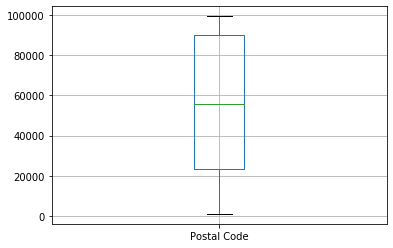

In [14]:
df.boxplot(column=['Postal Code'])
plt.show

From the above graph, we can see that there are no outliers 

<function matplotlib.pyplot.show(*args, **kw)>

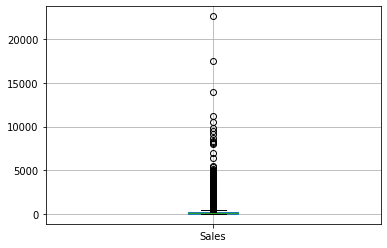

In [15]:
df.boxplot(column=['Sales'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

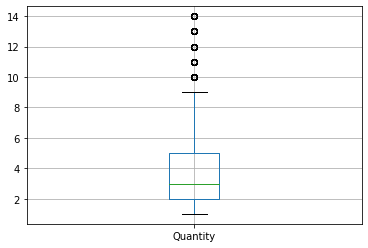

In [16]:
df.boxplot(column=['Quantity'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

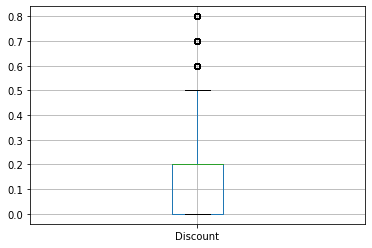

In [17]:
df.boxplot(column=['Discount'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

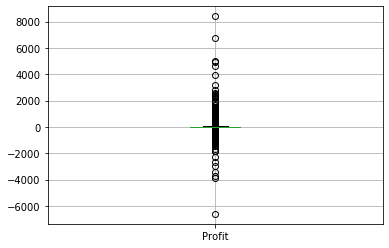

In [18]:
df.boxplot(column=['Profit'])
plt.show

From the above graphs, we can see that there is a presence of an outliers in Sales, Qunatity, Discount, Profit

In [19]:
#removing the outliers
def removeoutliers (col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lowerrange=Q1-(1.5*IQR)
    upperrange=Q3+(1.5*IQR)
    return lowerrange, upperrange

<function matplotlib.pyplot.show(*args, **kw)>

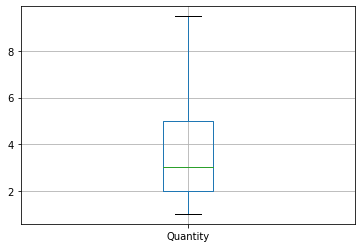

In [20]:
low,high=removeoutliers(df['Quantity'])
df['Quantity']=np.where(df['Quantity']>high,high,df['Quantity'])
df['Quantity']=np.where(df['Quantity']<low,low,df['Quantity'])
df.boxplot(column=['Quantity'])
plt.show

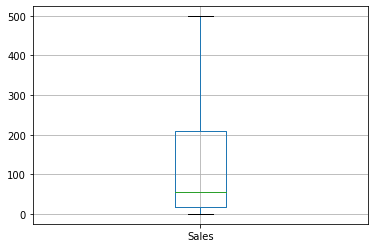

In [21]:
low,high=removeoutliers(df['Sales'])
df['Sales']=np.where(df['Sales']>high,high,df['Sales'])
df['Sales']=np.where(df['Sales']<low,low,df['Sales'])
df.boxplot(column=['Sales'])


<function matplotlib.pyplot.show(*args, **kw)>

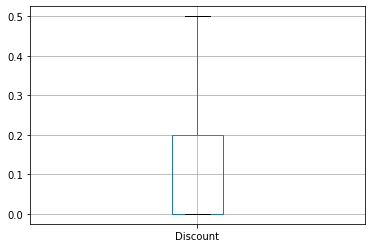

In [22]:
low,high=removeoutliers(df['Discount'])
df['Discount']=np.where(df['Discount']>high,high,df['Discount'])
df['Discount']=np.where(df['Discount']<low,low,df['Discount'])
df.boxplot(column=['Discount'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

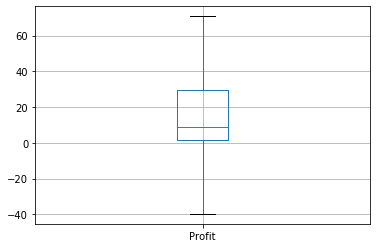

In [23]:
low,high=removeoutliers(df['Profit'])
df['Profit']=np.where(df['Profit']>high,high,df['Profit'])
df['Profit']=np.where(df['Profit']<low,low,df['Profit'])
df.boxplot(column=['Profit'])
plt.show

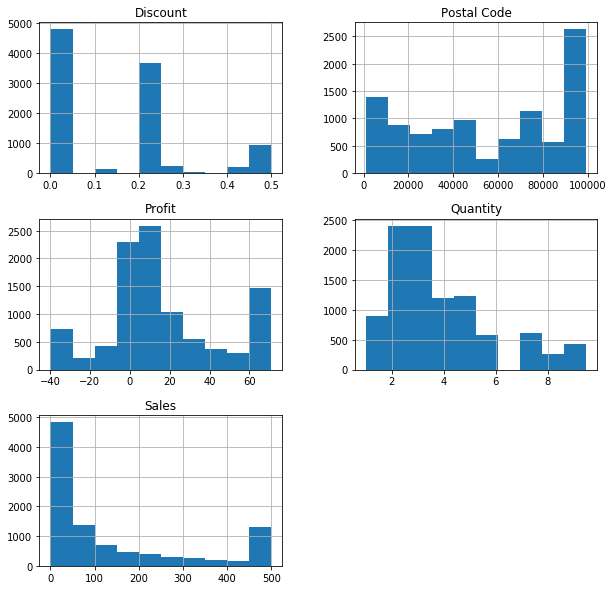

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
df.hist()
plt.show()


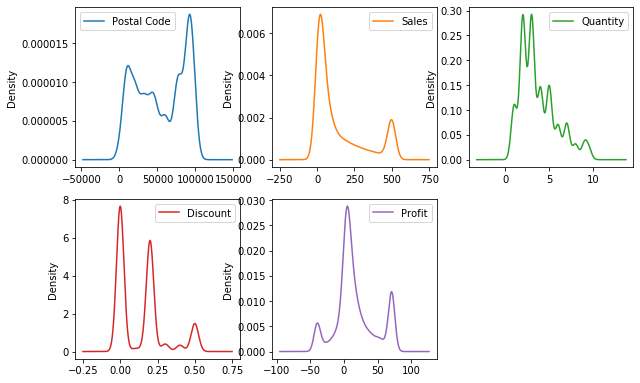

In [25]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

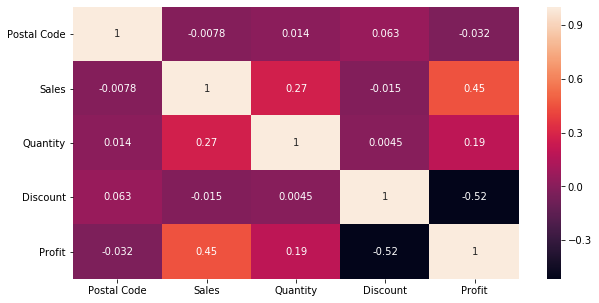

In [26]:
plt.figure(figsize=(10,5))
cax=sns.heatmap(df.corr(),annot=True)

Values close to 1 are positively correlated, values close to -1 are negatively correlated and values close to 0 shows that there is no linear relationship between the two variables. 

Discount and Profit are negatively correlated 

Sales and Profit are positively correlated 


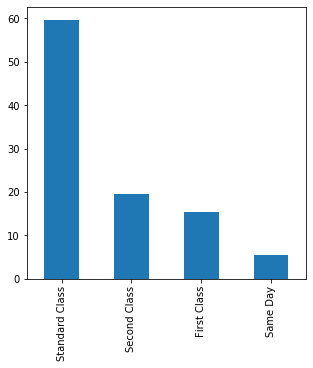

In [27]:
plt.figure(figsize=(5,5))
(df['Ship Mode'].value_counts()/len(df['Ship Mode'])*100).plot(kind='bar')

Highest mode of shipment belongs to Standard Class and the least one is on the same day delivery

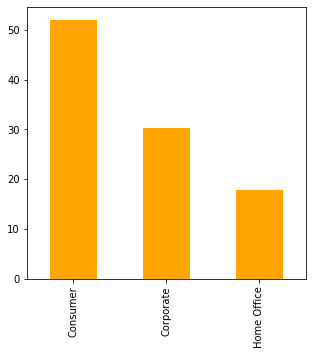

In [28]:
plt.figure(figsize=(5,5))
(df['Segment'].value_counts()/len(df['Segment'])*100).plot(kind='bar',color='orange')

Maximum product was shipped to 'consumer' segment i.e around 52% followed by 'corporate' with 30% and 'home office' with 18%

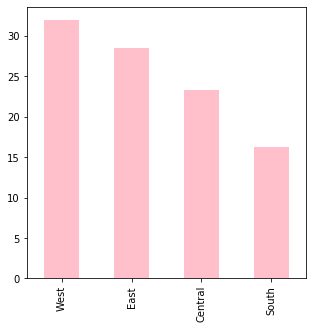

In [29]:
plt.figure(figsize=(5,5))
(df['Region'].value_counts()/len(df['Region'])*100).plot(kind='bar',color='Pink')

Maximum shippment is done in the western region of the country and least in the southern region

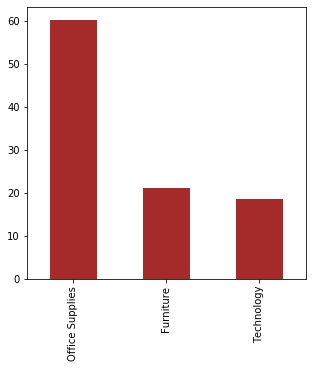

In [30]:
plt.figure(figsize=(5,5))
(df['Category'].value_counts()/len(df['Category'])*100).plot(kind='bar',color='brown')

Maximum shippment product belongs to 'Office Supplies' category (around 60%)

In [31]:
df.groupby('State').size()

State
Alabama                   61
Arizona                  224
Arkansas                  60
California              1996
Colorado                 182
Connecticut               82
Delaware                  96
District of Columbia      10
Florida                  383
Georgia                  184
Idaho                     21
Illinois                 491
Indiana                  149
Iowa                      30
Kansas                    24
Kentucky                 139
Louisiana                 42
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 254
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               130
New Mexico                37
New York                1127
North Carolina           249
North Dakota               7
Ohio                     468
Oklahoma

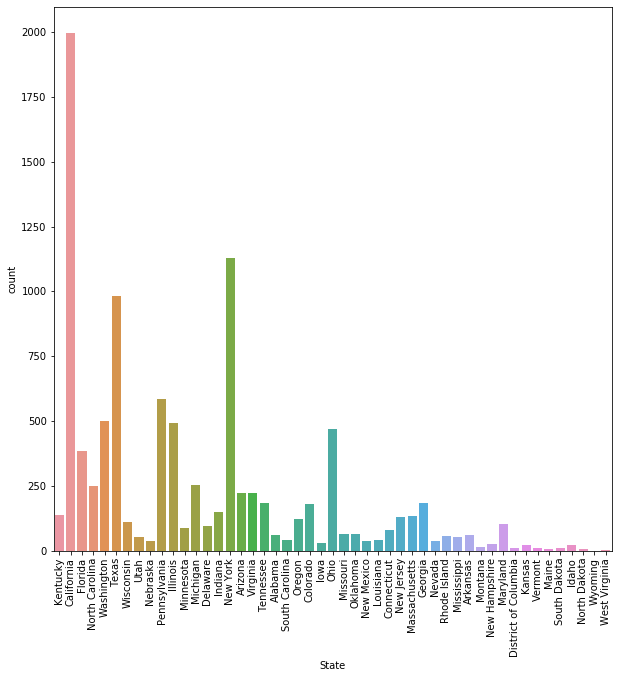

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

California, New York and Texas are the top 3 state which has highest shippment 

In [33]:
df.groupby('Sub-Category').size()

Sub-Category
Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319
dtype: int64

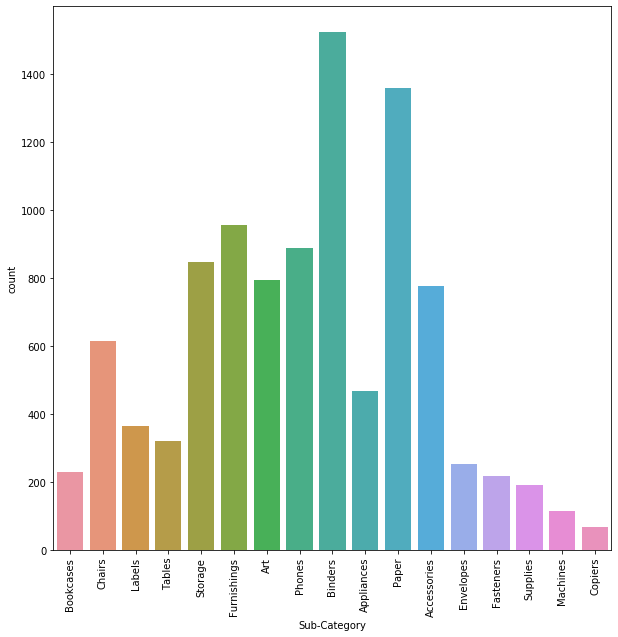

In [34]:
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

Maximum shippment products belongs to Binders, Paper and Furnidhings sub-categories 

<Figure size 360x360 with 0 Axes>

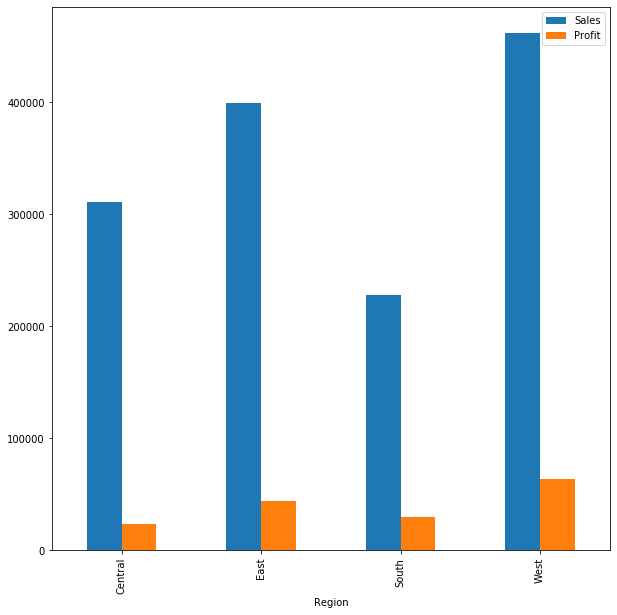

In [41]:
plt.figure(figsize=(5,5))
df.groupby(['Region'])['Sales','Profit'].agg('sum').plot.bar()


<Figure size 360x360 with 0 Axes>

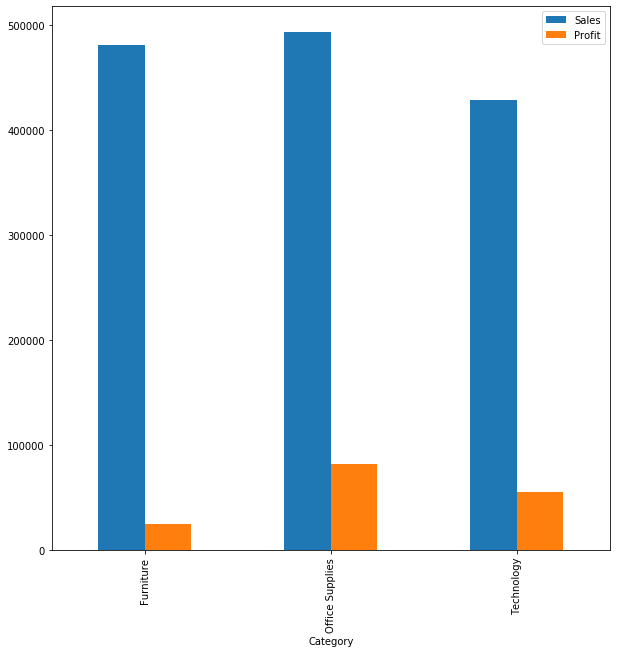

In [42]:
plt.figure(figsize=(5,5))
df.groupby(['Category'])['Sales','Profit'].agg('sum').plot.bar()


From the above plot we see that, office supplies category has maximum sale and profit 

<Figure size 720x360 with 0 Axes>

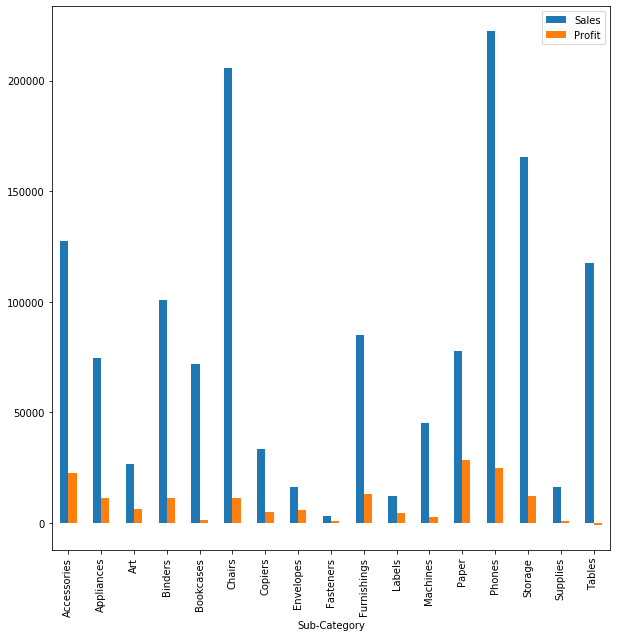

In [37]:
plt.figure(figsize=(10,5))
df.groupby(['Sub-Category'])['Sales','Profit'].agg('sum').plot.bar()
plt.show()

From the above chart we see that, 

the maximum sale is under phones sub-category 

the maximum profit is under paper sub-category

tables sub-category experiences extreme loss 

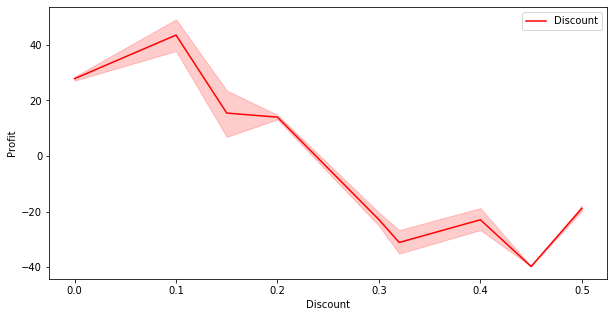

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot('Discount', 'Profit',data=df,color='r',label='Discount')
plt.legend()


From  above chart we see that , as the discount increases the profit decreases 